In [4]:
import numpy as np
import numpy.linalg as LA
import pandas as pd
import time
import sklearn
from sklearn import linear_model 

In [40]:
def sparse_vector(n, k):
    x = np.zeros(n)
    i = np.random.permutation(n)
    x[i[:k]] = 1
    return x
    
def get_signals(n, d, k):
    x = sparse_vector(d, k)
    A = np.random.randn(n, d)
    y = A @ x
    return y, A, x

def get_stats(model, x_star):
    x_hat = model.coef_
    return {'rel_error': LA.norm(x_hat - x_star) / LA.norm(x_star)}

def solve(n=100, d=1000, sparse=10, seed=42, **kwargs):
    np.random.seed(seed)
    y, A, x = get_signals(n, d, sparse)
    model = linear_model.Lasso(max_iter=1000, tol=0, alpha=1e-2 * sparse)
    model.fit(A, y)
    
    return {'num_observations': n, 'signal_dimension': d, 'seed': seed, 
            'sparsity': sparse, **get_stats(model, x)}

In [46]:
d = 100
data = []
sklearn.__version__

'0.19.0'

In [47]:
n, k = 0, 0
for seed in range(4):
    print(f"n={n}, k={k}, seed={seed}")
    for k in np.logspace(0, 2, num=30, dtype=int):
        for n in np.logspace(1, np.log10(d), num=30, dtype=int):
            data += [solve(n=n, d=d, sparse=k, seed=seed)]

n=0, k=0, seed=0


/Users/scott/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


n=100, k=100, seed=1
n=100, k=100, seed=2
n=100, k=100, seed=3


In [48]:
import seaborn as sns
df = pd.DataFrame(data)
df.to_csv('results.csv')
df.head()

,num_observations,rel_error,seed,signal_dimension,sparsity
0,10,1.108294,0,100,1
1,10,1.108294,0,100,1
2,11,0.030519,0,100,1
3,12,0.029691,0,100,1
4,13,0.014831,0,100,1


In [51]:
show = df.pivot_table(columns='sparsity', index='num_observations', values='rel_error')

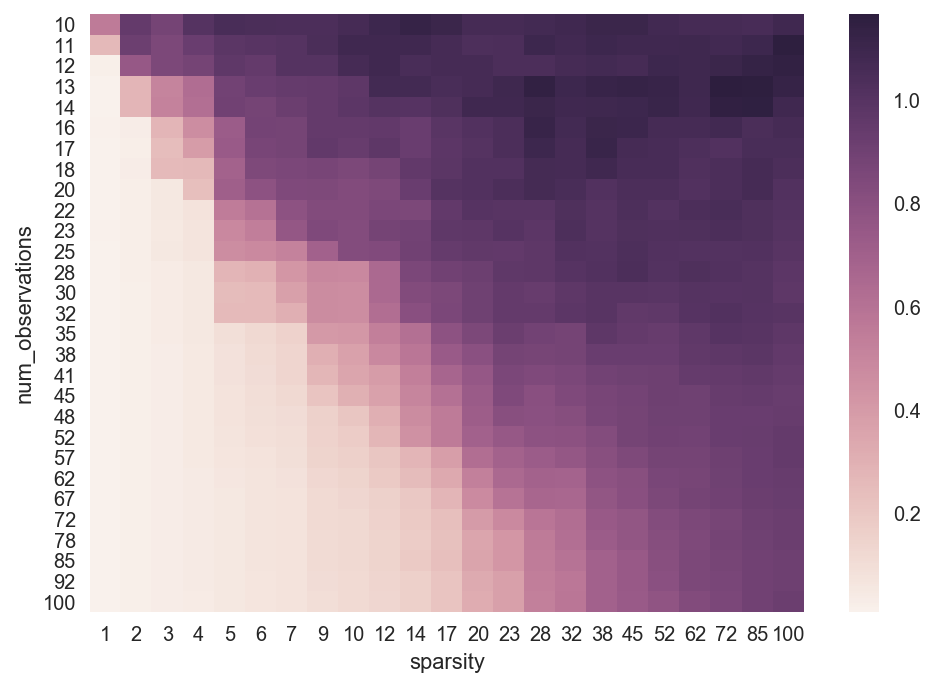

In [52]:
sns.heatmap(show)